In [12]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  4 11:42:41 2017

@author: lhuan
"""
# import modules
%matplotlib inline
import plotly.plotly as py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')

In [5]:
# load data
df_2012_2017 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False,warn_bad_lines=True,low_memory=False)
df_2008_2011 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False,warn_bad_lines=True,low_memory=False)
df_2005_2007 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False,warn_bad_lines=True,low_memory=False)
df_2001_2004 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False,warn_bad_lines=True,low_memory=False)

b'Skipping line 1149094: expected 23 fields, saw 41\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1513591: expected 23 fields, saw 24\n'


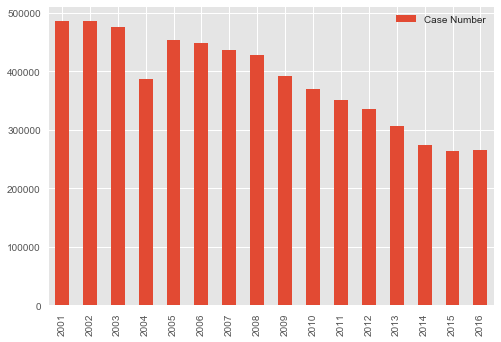

In [6]:
# crime by unique cases by year
tot_crime_2012_2017 = df_2012_2017.groupby('Year')['Case Number'].nunique()
tot_crime_2008_2011 = df_2008_2011.groupby('Year')['Case Number'].nunique()
tot_crime_2005_2007 = df_2005_2007.groupby('Year')['Case Number'].nunique()
tot_crime_2001_2004 = df_2001_2004.groupby('Year')['Case Number'].nunique()

tot_crime_2001_2017 = tot_crime_2001_2004.append(tot_crime_2005_2007,ignore_index = False)
tot_crime_2001_2017 = tot_crime_2001_2017.append(tot_crime_2008_2011,ignore_index = False)
tot_crime_2001_2017 = tot_crime_2001_2017.append(tot_crime_2012_2017,ignore_index = False)

tot_crime_2001_2017 = tot_crime_2001_2017.to_frame()
tot_crime_2001_2017 = tot_crime_2001_2017[tot_crime_2001_2017['Case Number'] != 1]
tot_crime_2001_2017.index = tot_crime_2001_2017.index.map(np.int64)

# get rid of 2017 data
tot_crime_2001_2016 = tot_crime_2001_2017.drop(tot_crime_2001_2017.index[16])

# plot crime cases by year
tot_crime_2001_2016.plot(kind='bar')

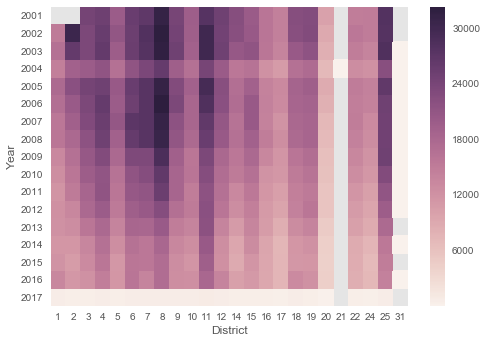

In [7]:
# crime by unique cases by district by year
crime_dis_2012_2017 = df_2012_2017.groupby(['Year','District'])['Case Number'].nunique()
crime_dis_2008_2011 = df_2008_2011.groupby(['Year','District'])['Case Number'].nunique()
crime_dis_2005_2007 = df_2005_2007.groupby(['Year','District'])['Case Number'].nunique()
crime_dis_2001_2004 = df_2001_2004.groupby(['Year','District'])['Case Number'].nunique()

crime_dis_2001_2017 = crime_dis_2001_2004.append(crime_dis_2005_2007, ignore_index = False)
crime_dis_2001_2017 = crime_dis_2001_2017.append(crime_dis_2008_2011, ignore_index = False)
crime_dis_2001_2017 = crime_dis_2001_2017.append(crime_dis_2012_2017, ignore_index = False)

crime_dis_2001_2017 = crime_dis_2001_2017.to_frame()
crime_dis_2001_2017 = crime_dis_2001_2017[crime_dis_2001_2017['Case Number'] != 1]
crime_dis_2001_2017 = crime_dis_2001_2017.reset_index()
crime_dis_2001_2017['Year'] = crime_dis_2001_2017['Year'].map(np.int64)
crime_dis_2001_2017['District'] = crime_dis_2001_2017['District'].map(np.int64)
crime_dis_2001_2016 = crime_dis_2001_2017.drop(crime_dis_2001_2017['Year'] == 2017)

# heat map for crime cases by district by year
crime_dis_pivot = crime_dis_2001_2016.pivot('Year','District','Case Number')
crime_dis_heatmap = sns.heatmap(crime_dis_pivot)

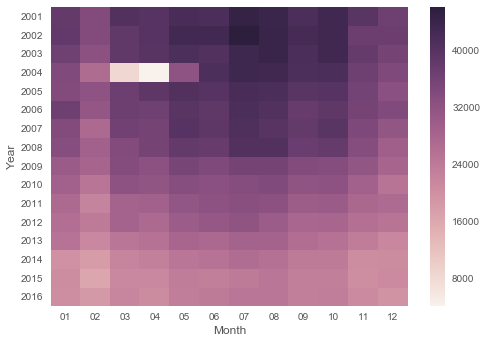

In [8]:
# crime by unique cases by month by year
x = df_2012_2017['Date']
df_2012_2017['Month'] = x.apply(lambda x: x[:2])

x = df_2008_2011['Date']
df_2008_2011['Month'] = x.apply(lambda x: x[:2])

x = df_2005_2007['Date']
df_2005_2007['Month'] = x.apply(lambda x: x[:2])

x = df_2001_2004['Date']
df_2001_2004['Month'] = x.apply(lambda x: x[:2])

crime_m_2012_2017 = df_2012_2017.groupby(['Year','Month'])['Case Number'].nunique()
crime_m_2008_2011 = df_2008_2011.groupby(['Year','Month'])['Case Number'].nunique()
crime_m_2005_2007 = df_2005_2007.groupby(['Year','Month'])['Case Number'].nunique()
crime_m_2001_2004 = df_2001_2004.groupby(['Year','Month'])['Case Number'].nunique()

crime_m_2001_2017 = crime_m_2001_2004.append(crime_m_2005_2007,ignore_index = False)
crime_m_2001_2017 = crime_m_2001_2017.append(crime_m_2008_2011,ignore_index = False)
crime_m_2001_2017 = crime_m_2001_2017.append(crime_m_2012_2017,ignore_index = False)

crime_m_2001_2017 = crime_m_2001_2017.to_frame()
crime_m_2001_2017 = crime_m_2001_2017[crime_m_2001_2017['Case Number'] != 1]
crime_m_2001_2017 = crime_m_2001_2017.reset_index()
crime_m_2001_2017['Year'] = crime_m_2001_2017['Year'].map(np.int64)
crime_m_2001_2016 = crime_m_2001_2017[:-1]

# crime by month by year heat map
crime_m_pivot = crime_m_2001_2016.pivot('Year','Month','Case Number')
crime_m_heatmap = sns.heatmap(crime_m_pivot)

C:\Users\lhuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



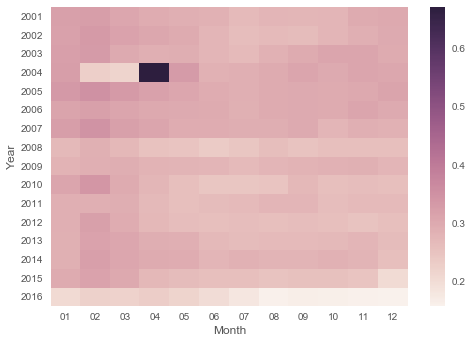

In [9]:
# arrest proportion
crime_a_2012_2017 = df_2012_2017.groupby(['Year','Month','Arrest'])['Case Number'].nunique()
crime_a_2008_2011 = df_2008_2011.groupby(['Year','Month','Arrest'])['Case Number'].nunique()
crime_a_2005_2007 = df_2005_2007.groupby(['Year','Month','Arrest'])['Case Number'].nunique()
crime_a_2001_2004 = df_2001_2004.groupby(['Year','Month','Arrest'])['Case Number'].nunique()

crime_a_2001_2017 = crime_a_2001_2004.append(crime_a_2005_2007, ignore_index = False)
crime_a_2001_2017 = crime_a_2001_2017.append(crime_a_2008_2011, ignore_index = False)
crime_a_2001_2017 = crime_a_2001_2017.append(crime_a_2012_2017, ignore_index = False)

crime_a_2001_2017 = crime_a_2001_2017.to_frame()
crime_a_2001_2017 = crime_a_2001_2017[crime_a_2001_2017['Case Number'] != 1]
crime_a_2001_2017 = crime_a_2001_2017.unstack(level = 2)

crime_a_2001_2017 = crime_a_2001_2017.reset_index()


crime_a_2001_2017['Year'] = crime_a_2001_2017['Year'].map(np.int64)
crime_a_2001_2016 = crime_a_2001_2017[:-1]
crime_a_2001_2016['Arrest Ratio'] = crime_a_2001_2016['Case Number'][True]/(crime_a_2001_2016['Case Number'][True]+crime_a_2001_2016['Case Number'][False])

# Arrest Ratio by month by year heat map
crime_a_pivot = crime_a_2001_2016.pivot('Year','Month','Arrest Ratio')
crime_m_heatmap = sns.heatmap(crime_a_pivot)


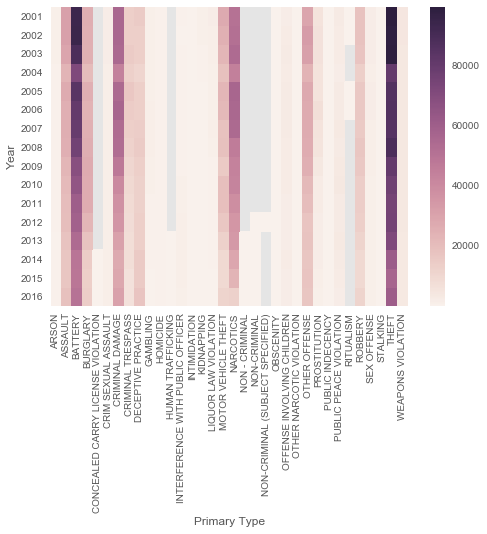

In [10]:
# Primary crime type by year
crime_p_2012_2017 = df_2012_2017.groupby(['Year','Primary Type'])['Case Number'].nunique()
crime_p_2008_2011 = df_2008_2011.groupby(['Year','Primary Type'])['Case Number'].nunique()
crime_p_2005_2007 = df_2005_2007.groupby(['Year','Primary Type'])['Case Number'].nunique()
crime_p_2001_2004 = df_2001_2004.groupby(['Year','Primary Type'])['Case Number'].nunique()

crime_p_2001_2017 = crime_p_2001_2004.append(crime_p_2005_2007, ignore_index = False)
crime_p_2001_2017 = crime_p_2001_2017.append(crime_p_2008_2011, ignore_index = False)
crime_p_2001_2017 = crime_p_2001_2017.append(crime_p_2012_2017, ignore_index = False)

crime_p_2001_2017 = crime_p_2001_2017.to_frame()
crime_p_2001_2017 = crime_p_2001_2017[crime_p_2001_2017['Case Number'] != 1]
crime_p_2001_2017 = crime_p_2001_2017.reset_index()
crime_p_2001_2017['Year'] = crime_p_2001_2017['Year'].map(np.int64)
crime_p_2001_2016 = crime_p_2001_2017.drop(crime_p_2001_2017.index[crime_p_2001_2017['Year'] == 2017])

# primary crime type by year heat map
crime_p_pivot = crime_p_2001_2016.pivot('Year','Primary Type','Case Number')
crime_p_heatmap = sns.heatmap(crime_p_pivot)

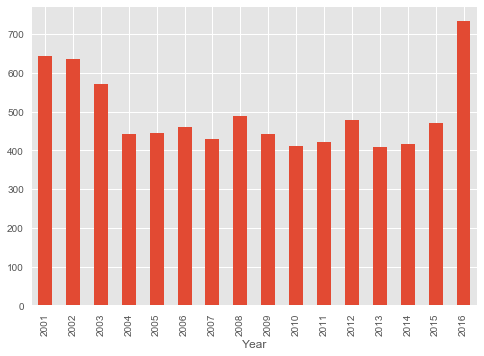

In [11]:
# Homicide by year
hom_2012_2017 = df_2012_2017[df_2012_2017['Primary Type'] == 'HOMICIDE']
hom_2008_2011 = df_2008_2011[df_2008_2011['Primary Type'] == 'HOMICIDE']
hom_2005_2007 = df_2005_2007[df_2005_2007['Primary Type'] == 'HOMICIDE']
hom_2001_2004 = df_2001_2004[df_2001_2004['Primary Type'] == 'HOMICIDE']

hom_2001_2017 = hom_2001_2004.append(hom_2005_2007,ignore_index = False)
hom_2001_2017 = hom_2001_2017.append(hom_2008_2011,ignore_index = False)
hom_2001_2017 = hom_2001_2017.append(hom_2012_2017,ignore_index = False)

hom_2001_2017['Year'] = hom_2001_2017['Year'].map(np.int64)

hom_2001_2016  = hom_2001_2017[hom_2001_2017['Year'] < 2017]

hom_y_2001_2016 = hom_2001_2016.groupby(['Year'])['Case Number'].nunique()
hom_y_2001_2016.plot(kind='bar')


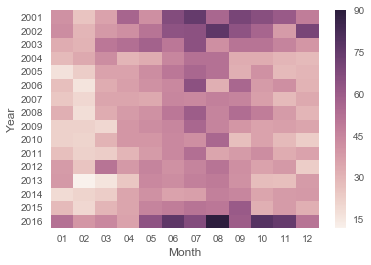

In [14]:
# Homicide by month by year
hom_m_2001_2016 = hom_2001_2016.groupby(['Year','Month'])['Case Number'].nunique()
hom_m_2001_2016 = hom_m_2001_2016.to_frame()
hom_m_2001_2016 = hom_m_2001_2016.reset_index()
# heatmap
homicide_m_pivot = hom_m_2001_2016.pivot('Year','Month','Case Number')
homicide_m_heatmap = sns.heatmap(homicide_m_pivot)

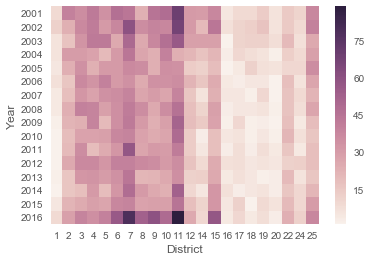

In [15]:
# Homicide by district by year
hom_d_2001_2016 = hom_2001_2016.groupby(['Year','District'])['Case Number'].nunique()
hom_d_2001_2016 = hom_d_2001_2016.to_frame()
hom_d_2001_2016 = hom_d_2001_2016.reset_index()
hom_d_2001_2016['District'] = hom_d_2001_2016['District'].map(np.int64)
# heatmap
homicide_d_pivot = hom_d_2001_2016.pivot('Year','District','Case Number')
homicide_d_heatmap = sns.heatmap(homicide_d_pivot)

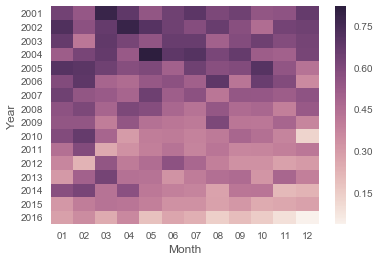

In [16]:
# Arrest Ratio for Homicide by month by year
hom_a_2001_2016 = hom_2001_2016.groupby(['Year','Month','Arrest'])['Case Number'].nunique()
hom_a_2001_2016 = hom_a_2001_2016.unstack(level = 2)
hom_a_2001_2016 = hom_a_2001_2016.reset_index()
hom_a_2001_2016['Arrest Ratio'] = hom_a_2001_2016[True]/(hom_a_2001_2016[True]+hom_a_2001_2016[False])

# heat map
hom_a_pivot = hom_a_2001_2016.pivot('Year','Month','Arrest Ratio')
hom_a_heatmap = sns.heatmap(hom_a_pivot)